# Zachary Karate Club partitioning prediction

vanilla implementation with no optimization (random weights)

adapted from https://petamind.com/an-example-to-graph-convolutional-network/

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from networkx import karate_club_graph, to_numpy_matrix
from sklearn.preprocessing import OneHotEncoder

{'club': 'Mr. Hi'} {'club': 'Officer'}


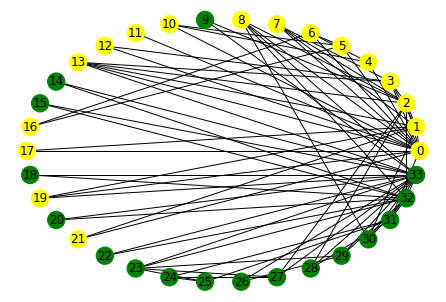

In [2]:
zkc = karate_club_graph()
print(zkc.nodes[0], zkc.nodes[33])

color_map = []
for i in range(len(zkc.nodes)):
  if zkc.nodes[i].get('club') == 'Mr. Hi':
    color_map.append('yellow')
  else:
    color_map.append('green')
nx.draw_circular(zkc, node_color=color_map, with_labels=True)
plt.savefig("zkc_circle.pdf")
plt.show()

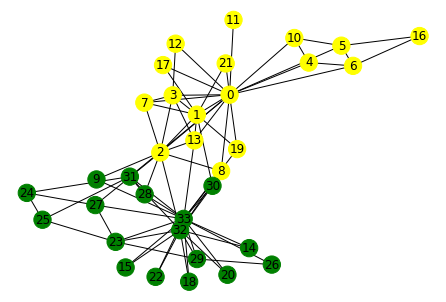

In [3]:
nx.draw_spring(zkc, node_color=color_map, with_labels=True)
plt.savefig("zkc_spring.pdf")
plt.show()

- Sort the nodes according to their lables
- Create the adjacency matrix via networkx function to_numpy_matrix()

In [4]:
order = sorted(list(zkc.nodes()))
A = to_numpy_matrix(zkc, nodelist=order)
print(A)

[[0. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]


In [5]:
ohe = OneHotEncoder()
X = np.reshape([i for i in np.linspace(1, 34, 34)], (-1, 1))
X = ohe.fit_transform(X).toarray()
print(X)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [6]:
I = np.eye(zkc.number_of_nodes())
A_hat = A + I
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))

In [7]:
np.random.seed(0)

#W1 with size 34x4
W_1 = np.random.normal(
    loc=0, scale=1, size=(zkc.number_of_nodes(), 4)) 
#W2 with size 4x 2
W_2 = np.random.normal(
    loc=0, size=(W_1.shape[1], 2))

In [8]:
def relu(x):
  return np.maximum(x, 0)

In [9]:
def gcn_layer(A_hat, D_hat, X, W):
    return relu(D_hat**-1 * A_hat * X * W)

H_1 = gcn_layer(A_hat, D_hat, X, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2

print(output.shape, '\n', output)

(34, 2) 
 [[0.11667818 0.38063879]
 [0.         0.33916054]
 [0.13539985 0.21502645]
 [0.04664283 0.35891462]
 [0.24935323 0.26680363]
 [0.08298786 0.24960744]
 [0.25030119 0.2106913 ]
 [0.0463653  0.28579697]
 [0.16592458 0.23405359]
 [0.25255571 0.        ]
 [0.24206041 0.3697818 ]
 [0.33479527 0.56539781]
 [0.07650399 0.42870402]
 [0.03239575 0.28356495]
 [0.11050172 0.02207443]
 [0.06144536 0.04378782]
 [0.13937945 0.16117033]
 [0.         0.46188035]
 [0.14063403 0.06460663]
 [0.         0.27539578]
 [0.116903   0.        ]
 [0.         0.24642904]
 [0.16881499 0.04408708]
 [0.29348452 0.        ]
 [0.45406318 0.        ]
 [0.5909063  0.1180902 ]
 [0.24228753 0.        ]
 [0.36260433 0.        ]
 [0.32306056 0.06859164]
 [0.28892249 0.        ]
 [0.09156963 0.29543826]
 [0.33595802 0.14397111]
 [0.25931697 0.02213558]
 [0.24368001 0.01624763]]


In [10]:
feature_representations = {
    node: np.array(output)[node] 
    for node in zkc.nodes()}

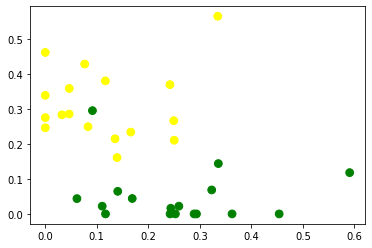

In [11]:
plt.scatter([output[:, 0]], [output[:, 1]], c = color_map, marker='o', s=60)
plt.show()